In [28]:
%matplotlib notebook

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob

Glycerin and water

In [30]:
glycerine_files = glob.glob('../data/glycerin*')
water_files = glob.glob('../data/water*')
sand_files = glob.glob('../data/sand*Nov__4*')

Make data frames:

In [31]:
gframes = []
for f in glycerine_files:
    gframes.append(pd.DataFrame((np.loadtxt(f)).T,columns=["time","volume","pressure"]))
wframes = []
for f in water_files:
    wframes.append(pd.DataFrame((np.loadtxt(f)).T,columns=["time","volume","pressure"]))
sframes = []
for f in sand_files:
    sframes.append(pd.DataFrame((np.loadtxt(f)).T,columns=["time","volume","pressure"]))

In [32]:
print(len(gframes),len(wframes),len(sframes))

2 2 9


In [33]:
gframes[0].head()

,time,volume,pressure
0,53.218854,252.0,937.62
1,53.378559,251.0,937.65
2,53.570494,252.0,937.65
3,53.762241,248.0,937.63
4,53.954100,249.0,937.65


In [34]:
wframes[0].head()

,time,volume,pressure
0,154.273348,257.0,946.06
1,154.433098,252.0,946.18
2,154.592845,253.0,946.15
3,154.752598,252.0,946.11
4,154.912189,253.0,946.12


In [35]:
sframes[0].head()

,time,volume,pressure
0,3629.318228,251.0,950.74
1,3629.510149,253.0,950.78
2,3629.701823,254.0,950.75
3,3629.861731,250.0,950.83
4,3630.053497,252.0,950.87


Smooth the data sets to find cut-points:

In [36]:
gsmooth = []
wsmooth = []
ssmooth = []
gspan = 100
wspan = 100
sspan = 100
for fr in gframes:
    gsmooth.append(fr['volume'].ewm(span=gspan).mean())
for fr in wframes:
    wsmooth.append(fr['volume'].ewm(span=wspan).mean())
for fr in sframes:
    ssmooth.append(fr['volume'].ewm(span=sspan).mean())

<IPython.core.display.Javascript object>


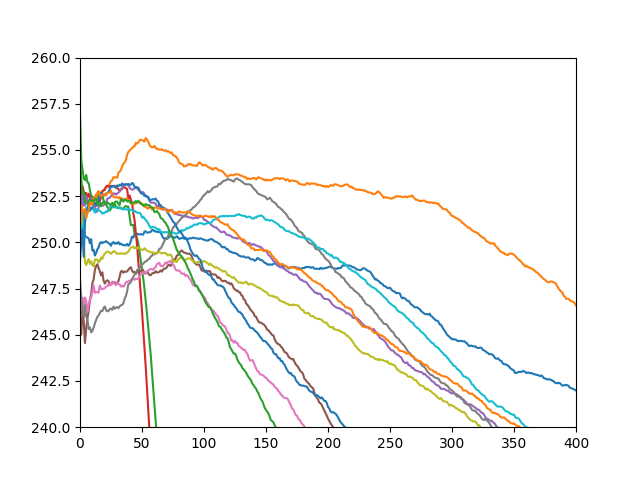

In [37]:
for fr in gsmooth:
    plt.plot(fr)
for fr in wsmooth:
    plt.plot(fr)
for fr in ssmooth:
    plt.plot(fr)
plt.xlim(0,400);
plt.ylim(240,260);

Cut the noise at the beginning of each trajectory.

In [38]:
gl = []
wa = []
sa = []
for ii,fr in enumerate(gsmooth):
    tmp = np.max(np.where(fr>=fr[0]))
    print(tmp)
    gl.append(gframes[ii]['volume'].to_numpy()[tmp:])
for ii,fr in enumerate(wsmooth):
    tmp = np.max(np.where(fr>=fr[0]))
    print(tmp)
    wa.append(wframes[ii]['volume'].to_numpy()[tmp:])
for ii,fr in enumerate(ssmooth):
    tmp = np.max(np.where(fr>=fr[0]))
    print(tmp)
    sa.append(sframes[ii]['volume'].to_numpy()[tmp:])

0
289
0
45
105
154
100
213
1
159
97
116
0


<IPython.core.display.Javascript object>


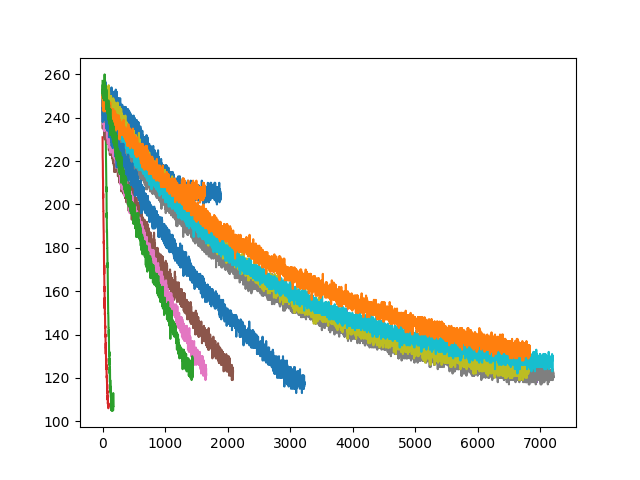

In [39]:
for fr in gl:
    plt.plot(fr)
for fr in wa:
    plt.plot(fr)
for fr in sa:
    plt.plot(fr)

Convert to volume.

In [40]:
tmp_g = []
tmp_w = []
tmp_s = []
for tmp in gl:
    tmp = (tmp[0] - tmp) / 10. * np.pi * (2.125 * 2.54)**2
    tmp_g.append(pd.Series(tmp,name='volume'))
for tmp in wa:
    tmp = (tmp[0] - tmp) / 10. * np.pi * (2.125 * 2.54)**2
    tmp_w.append(pd.Series(tmp,name='volume'))
for tmp in sa:
    tmp = (tmp[0] - tmp) / 10. * np.pi * (2.125 * 2.54)**2
    tmp_s.append(pd.Series(tmp,name='volume'))
gl = tmp_g
wa = tmp_w
sa = tmp_s

Plot the volume data:

glycerin


<IPython.core.display.Javascript object>


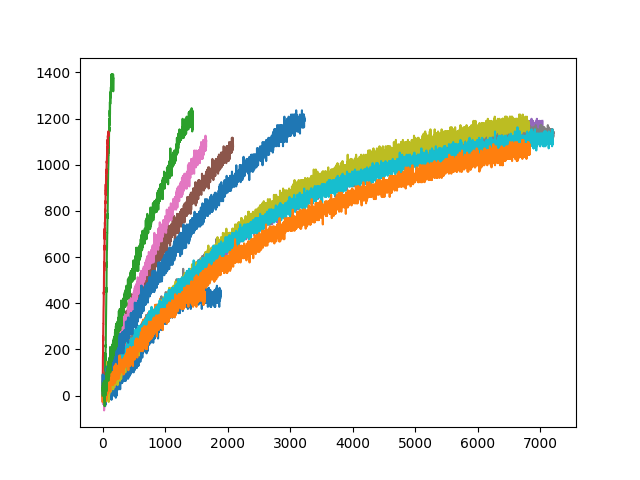

475.92499974232476
494.22980742472186
water
1391.16538386218
1144.0504801498191
sand
1198.9649031970105
1116.5932686262233
1125.745672467422
1171.507691673415
1217.2697108794075
1162.3552878322162
1235.5745185618046
1107.440864785025
1244.7269224030033


In [41]:
print('glycerin')
for fr in gl:
    plt.plot(fr)
    print(max(fr))
print('water')
for fr in wa:
    plt.plot(fr)
    print(max(fr))
print('sand')
for fr in sa:
    plt.plot(fr)
    print(max(fr))

Smooth the data sets to find cut-points:

In [42]:
gsmooth = []
wsmooth = []
ssmooth = []
for fr in gl:
    gsmooth.append(fr.ewm(span=5).mean().to_numpy())
for fr in wa:
    wsmooth.append(fr.ewm(span=5).mean().to_numpy())
for fr in sa:
    ssmooth.append(fr.ewm(span=5).mean().to_numpy())

In [43]:
print(gsmooth[0])
print(wsmooth[0])
print(ssmooth[0])

[  0.           5.4914423    2.89023279 ... 436.07408188 434.10371477
 438.89173925]
[   0.           27.45721152   31.79256071   37.59525886   37.21688387
   30.30615528   39.01884454   38.18316108   47.04147475   52.81674414
   50.43766457   48.86701054   50.89322587   49.17694455   38.862678
   41.16596502   33.537837     34.56245642   41.34950689   55.02766286
   58.04132173   56.99888284   62.40614728   62.95974004   63.3287836
   51.37127721   43.39978168   41.13636635   36.5766124    48.79088221
   53.88288147   48.12511276   50.38821969   48.84615127   53.91971329
   51.20048069   40.235253     39.02670688   44.32261299   44.8024151
   90.88430512  118.55476219   97.34131524   83.19901759  116.48203773
   99.01030064  108.71808507  118.24074262  142.89398869  168.4818899
  185.54049068  193.86208991  214.66382913  237.68405912  259.13248167
  279.5330326   302.28580372  317.4543178   345.87146821  367.86703642
  385.58154985  409.59443059  428.65381902  435.25847542  464.067989

<IPython.core.display.Javascript object>


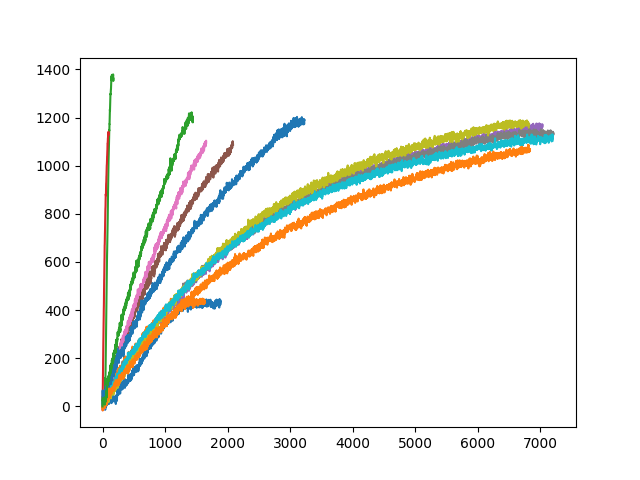

451.33870923026
469.7579601717694
1379.1754125476466
1140.7146127497083
1175.8217364287557
1101.545570213762
1103.5031782358576
1152.607444399522
1189.3737108826247
1130.4650392152378
1202.6487107705818
1086.600466264279
1221.6785344668372


In [44]:
for fr in gsmooth:
    plt.plot(fr)
    print(max(fr))
for fr in wsmooth:
    plt.plot(fr)
    print(max(fr))
for fr in ssmooth:
    plt.plot(fr)
    print(max(fr))

<IPython.core.display.Javascript object>


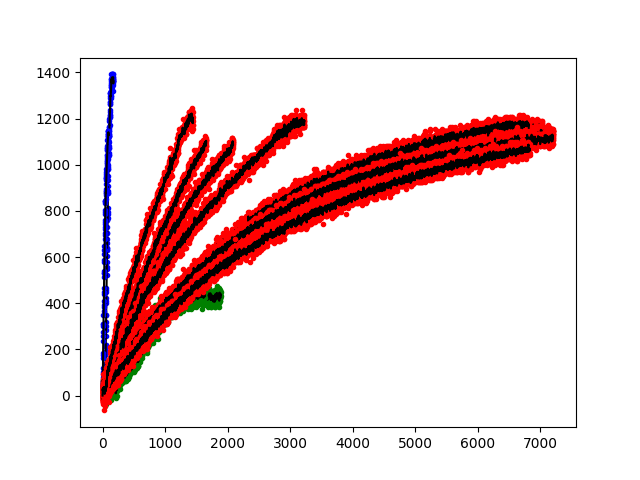

475.92499974232476
494.22980742472186
1391.16538386218
1144.0504801498191
1198.9649031970105
1116.5932686262233
1125.745672467422
1171.507691673415
1217.2697108794075
1162.3552878322162
1235.5745185618046
1107.440864785025
1244.7269224030033


In [45]:
for ii,fr in enumerate(gl):
    plt.plot(fr,'g.')
    plt.plot(gsmooth[ii],'k-')
    print(max(fr))
for ii,fr in enumerate(wa):
    plt.plot(fr,'b.')
    plt.plot(wsmooth[ii],'k-')
    print(max(fr))
for ii,fr in enumerate(sa):
    plt.plot(fr,'r.')
    plt.plot(ssmooth[ii],'k-')
    print(max(fr))

In [46]:
gclips = []
wclips = []
sclips = []
for fr in gsmooth:
    v = fr
    high = np.max(np.where(v<400.))
    low = np.max(np.where(v<100.))
    mid = np.max(np.where(v<250.))
    gclips.append([low,mid,high])
for fr in wsmooth:
    v = fr
    high = np.max(np.where(v<400.))
    low = np.max(np.where(v<100.))
    mid = np.max(np.where(v<250.))
    wclips.append([low,mid,high])
for fr in ssmooth:
    v = fr
    high = np.max(np.where(v<400.))
    low = np.max(np.where(v<100.))
    mid = np.max(np.where(v<250.))
    sclips.append([low,mid,high])

Convert the data from series back to numpy arrays.

In [47]:
tmp=[]
for fr in gl:
    tmp.append(fr.to_numpy())
gl = tmp
tmp=[]
for fr in wa:
    tmp.append(fr.to_numpy())
wa = tmp
tmp=[]
for fr in sa:
    tmp.append(fr.to_numpy())
sa = tmp

Clip the raw data and plot:

In [48]:
gsyms = []
for i,fr in enumerate(gl):
    lo = gclips[i][0]
    mid = gclips[i][1]
    hi = gclips[i][2]
    untrans = fr[lo:mid]
    trans = fr[mid:hi]
    if len(untrans)>len(trans):
        untrans = untrans[:len(trans)]
    elif len(trans)>len(untrans):
        trans = trans[:len(untrans)]
    gsyms.append([untrans,trans])
wsyms = []
for i,fr in enumerate(wa):
    lo = wclips[i][0]
    mid = wclips[i][1]
    hi = wclips[i][2]
    untrans = fr[lo:mid]
    trans = fr[mid:hi]
    if len(untrans)>len(trans):
        untrans = untrans[:len(trans)]
    elif len(trans)>len(untrans):
        trans = trans[:len(untrans)]
    wsyms.append([untrans,trans])
ssyms = []
for i,fr in enumerate(sa):
    lo = sclips[i][0]
    mid = sclips[i][1]
    hi = sclips[i][2]
    untrans = fr[lo:mid]
    trans = fr[mid:hi]
    if len(untrans)>len(trans):
        untrans = untrans[:len(trans)]
    elif len(trans)>len(untrans):
        trans = trans[:len(untrans)]
    ssyms.append([untrans,trans])

[[409, 772, 1365], [202, 564, 1041]]
[[45, 53, 60], [5, 11, 19]]
192.2004806651696
142.8939886942217
411.8581728539349
367.8670364242142
175 175


<IPython.core.display.Javascript object>


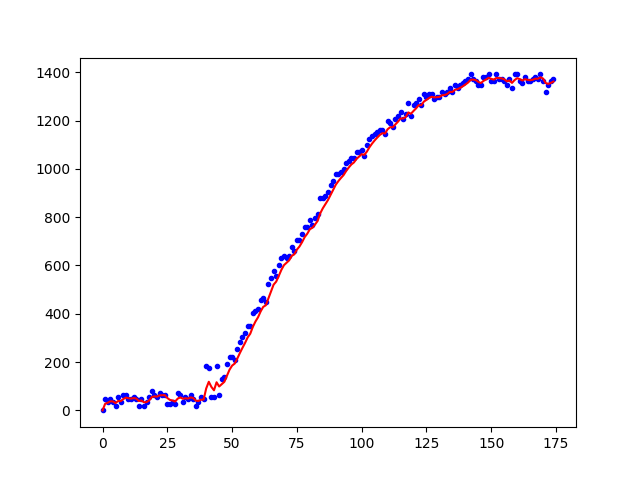

<IPython.core.display.Javascript object>


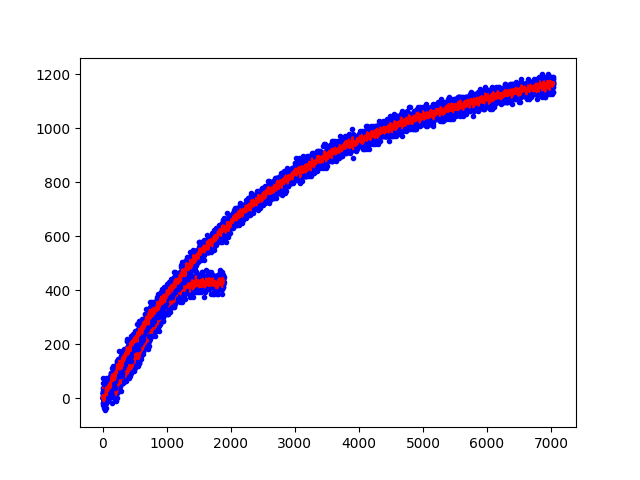

In [49]:
print(gclips)
print(wclips)
print(wa[0][48])
print(wsmooth[0][48])
print(wa[0][59])
print(wsmooth[0][59])
print(len(wa[0]),len(wsmooth[0]))
plt.plot(wa[0],'b.')
plt.plot(wsmooth[0],'r-')
plt.figure()
plt.plot(gl[0],'b.')
plt.plot(gsmooth[0],'r-')
plt.plot(sa[0],'b.')
plt.plot(ssmooth[0],'r-')

<IPython.core.display.Javascript object>


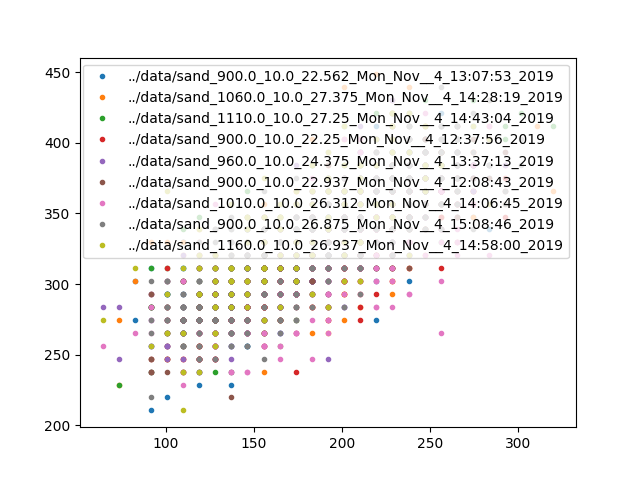

In [55]:
plt.figure()
legend_text = []
for ii,ss in enumerate(ssyms):
    plt.plot(ss[0],ss[1],linestyle='none',marker='.')
    legend_text.append(sand_files[ii])
plt.legend(legend_text)

<IPython.core.display.Javascript object>


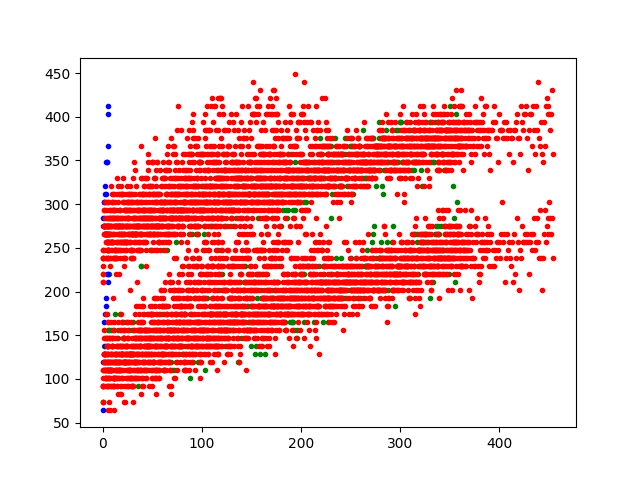

In [54]:
plt.figure()
for gs in gsyms:
    plt.plot(gs[0],'g.')
    plt.plot(gs[1],'g.')
for ws in wsyms:
    plt.plot(ws[0],'b.')
    plt.plot(ws[1],'b.')
for ss in ssyms:
    plt.plot(ss[0],'r.')
    plt.plot(ss[1],'r.')

<IPython.core.display.Javascript object>


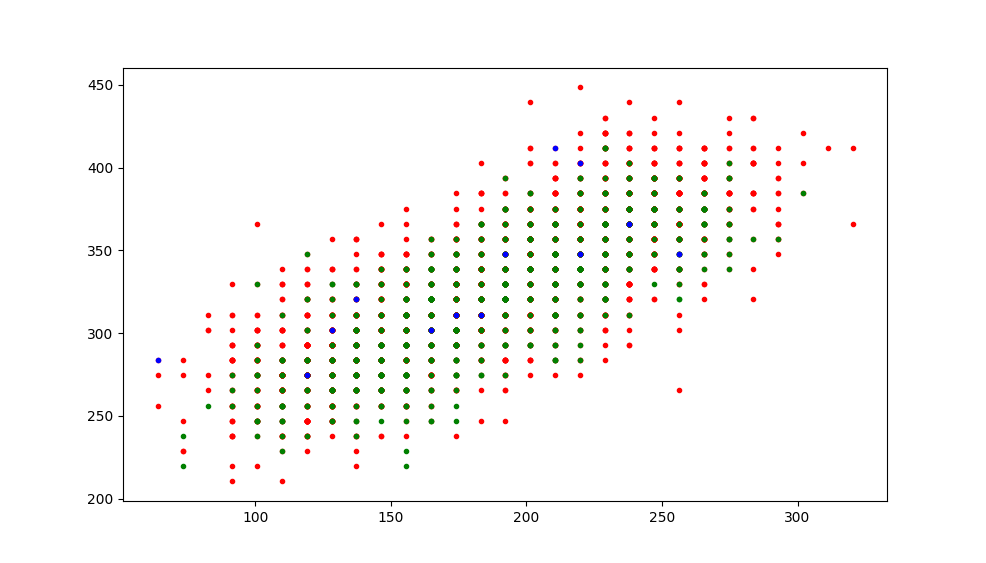

In [57]:
plt.figure()
for ss in ssyms:
    plt.plot(ss[0],ss[1],'r.')
for gs in gsyms:
    plt.plot(gs[0],gs[1],'g.')
for ws in wsyms:
    plt.plot(ws[0],ws[1],'b.')

In [58]:
gfits=[]
wfits=[]
sfits=[]
for gs in gsyms:
    f = np.polyfit(gs[0],gs[1],1)
    gfits.append(np.array(f).reshape(1,-1))
gfits = np.concatenate(gfits,axis=0)
for ws in wsyms:
    f = np.polyfit(ws[0],ws[1],1)
    wfits.append(np.array(f).reshape(1,-1))
wfits = np.concatenate(wfits,axis=0)
for ss in ssyms:
    f = np.polyfit(ss[0],ss[1],1)
    sfits.append(np.array(f).reshape(1,-1))
sfits = np.concatenate(sfits,axis=0)
print('glycerin fits:\n {}'.format(gfits))
print('water fits:\n {}'.format(wfits))
print('sand fits:\n {}'.format(sfits))

glycerin fits:
 [[  0.71335198 194.64162503]
 [  0.70732473 182.51011289]]
water fits:
 [[  0.70625    226.97961526]
 [  0.62555066 200.48602687]]
sand fits:
 [[  0.66860552 202.76684806]
 [  0.63323844 210.57999013]
 [  0.69132742 207.77760746]
 [  0.687028   192.23046451]
 [  0.76767719 184.37224836]
 [  0.69659256 193.71621437]
 [  0.61542107 201.93657277]
 [  0.72516612 195.70915548]
 [  0.73566177 206.54453109]]
